<a href="https://colab.research.google.com/github/caz1011/My_Pytorch_Study/blob/main/pytorch_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
torch.cuda.is_available()

False

# numpy

In [ ]:
import numpy as np

In [ ]:
np1 = np.random.randn(3,4)
np1

array([[-1.66764596,  1.2550811 ,  0.89975917, -1.15338844],
       [ 0.64331199,  0.50314575, -0.87253033, -1.03417641],
       [ 0.18516554, -1.00733359, -0.45056867, -0.98421521]])

In [ ]:
np1.dtype

dtype('float64')

In [ ]:
type(np1)

numpy.ndarray

In [ ]:
tensor_2d = torch.randn(2,3)
tensor_2d

tensor([[-1.0504, -2.1112, -1.6784],
        [-1.0515,  0.1677, -1.3358]])

In [ ]:
# TENSOR FROM NUMPY
tensor_numpy = torch.tensor(np1)
tensor_numpy

tensor([[-1.6676,  1.2551,  0.8998, -1.1534],
        [ 0.6433,  0.5031, -0.8725, -1.0342],
        [ 0.1852, -1.0073, -0.4506, -0.9842]], dtype=torch.float64)

# reshape和view的区别

In [ ]:
# reshape和view的区别
torchTensor1 = torch.arange(10)
torchTensor1

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torchTensor2 = torchTensor1.reshape(2,5)
torchTensor2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
torchTensor3 = torchTensor1.view(2,5)
torchTensor3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
torchTensor1[0] = 225
print(torchTensor1)
print(torchTensor2)
print(torchTensor3)

tensor([225,   1,   2,   3,   4,   5,   6,   7,   8,   9])
tensor([[225,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])
tensor([[225,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])


reshape和view具体不同之处
https://blog.csdn.net/qq_40765537/article/details/112471341

In [ ]:
#什么是连续存储？
#逻辑上相邻的元素，在内存中的存储也连续
#反之，逻辑上相邻的元素，在内存中的存储不连续
a = torch.arange(12)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
#原始a是0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11
#reshape之后逻辑上相邻的元素是
# 0 1 2
# 3 4 5
# 6 7 8
# 9 10 11
#实际上内存中存储的顺序是
#0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11
#所以是连续的
reshape_a = a.reshape(3,4)
reshape_a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
reshape_a.is_contiguous()

True

In [ ]:
#当调用转置操作之后
reshape_a_T = reshape_a.T
reshape_a_T

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [ ]:
#转置之后逻辑上相邻的元素是
# [[ 0,  4,  8],
# [ 1,  5,  9],
# [ 2,  6, 10],
# [ 3,  7, 11]]
#但是内存中的存储顺序依然是
#0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11
#所以是reshape_a_T是不连续的
reshape_a_T.is_contiguous()

False

In [ ]:
#者时候调用view方法
# reshape_b = reshape_a_T.view(2,6)
#view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead
#因为不连续，所以view使用不了
#可以先将reshape_a_T变成连续，再使用view
reshape_b = reshape_a_T.contiguous().view(2,6)
reshape_b

tensor([[ 0,  4,  8,  1,  5,  9],
        [ 2,  6, 10,  3,  7, 11]])

In [ ]:
#切片
my_torch = torch.arange(12).view(3,4)
my_torch

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
a = my_torch[:,0]#不保留原始维度
print(a)
print(a.shape)

tensor([0, 4, 8])
torch.Size([3])


In [ ]:
b = my_torch[:,0:1]#保留原始维度
print(b)
print(b.shape)

tensor([[0],
        [4],
        [8]])
torch.Size([3, 1])


# 张量的一些数学运算(加减乘除、矩阵乘)

In [ ]:
tensor_a = torch.tensor([1,2,3,4,5])
tensor_b = torch.tensor([6,7,8,9,10])

In [ ]:
#张量加法
add_a = tensor_a+tensor_b
add_a_longhand = torch.add(tensor_a,tensor_b)
print(add_a)
print(add_a_longhand)

tensor([ 7,  9, 11, 13, 15])
tensor([ 7,  9, 11, 13, 15])


In [ ]:
#张量减法
sub_a = tensor_b - tensor_a
print(sub_a)
sub_a_longhand = torch.sub(tensor_b,tensor_a)
print(sub_a_longhand)

tensor([5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5])


In [ ]:
#张量乘法
mul_a = tensor_a * tensor_b
print(mul_a)
mul_a_longhand = torch.mul(tensor_a,tensor_b)
print(mul_a_longhand)

tensor([ 6, 14, 24, 36, 50])
tensor([ 6, 14, 24, 36, 50])


In [ ]:
#张量除法
div_a = tensor_b / tensor_a
print(div_a)
div_a_longhand = torch.div(tensor_b,tensor_a)
print(div_a_longhand)

tensor([6.0000, 3.5000, 2.6667, 2.2500, 2.0000])
tensor([6.0000, 3.5000, 2.6667, 2.2500, 2.0000])


In [ ]:
#张量矩阵乘法
multiply_a = torch.mm(torch.arange(12).view(3,4),torch.arange(12).view(4,3))
multiply_a

tensor([[ 42,  48,  54],
        [114, 136, 158],
        [186, 224, 262]])

# 搭建简单的神经网络

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class My_Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
torch.manual_seed(42)
model = My_Model()
model

My_Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
x = torch.randn(3,4)
model(x).shape

torch.Size([3, 3])

# 训练数据准备

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data['Species'] = data['Species'].replace('Iris-setosa',0)
data['Species'] = data['Species'].replace('Iris-versicolor',1)
data['Species'] = data['Species'].replace('Iris-virginica',2)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
X = data.iloc[:,1:-1]

In [ ]:
y = data.iloc[:,-1]

In [ ]:
X = X.values

In [ ]:
y = y.values

In [ ]:
X = torch.FloatTensor(X)

In [ ]:
X.dtype

torch.float32

In [ ]:
y = torch.LongTensor(y)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)
print(train_X.shape)
print(train_y.shape)

torch.Size([120, 4])
torch.Size([120])


In [ ]:
print(test_X.shape)
print(test_y.shape)

torch.Size([30, 4])
torch.Size([30])


# 训练过程

In [ ]:
criterion = nn.CrossEntropyLoss()
optimize = torch.optim.Adam(model.parameters(),lr = 0.01)

In [ ]:


epochs = 150
losses = []
for i in range(epochs):
  optimize.zero_grad()
  y_pred = model.forward(train_X)
  loss = criterion(y_pred,train_y)

  loss.backward()
  optimize.step()
  losses.append(loss.detach().item())

  if i % 10 ==0:
    print(f"Epoch:{i},loss:{loss.detach().item()}")




Epoch:0,loss:1.1973121166229248
Epoch:10,loss:1.0163519382476807
Epoch:20,loss:0.895247757434845
Epoch:30,loss:0.7789366841316223
Epoch:40,loss:0.6230968236923218
Epoch:50,loss:0.3830468952655792
Epoch:60,loss:0.21116439998149872
Epoch:70,loss:0.1203203946352005
Epoch:80,loss:0.08342476189136505
Epoch:90,loss:0.07000991702079773
Epoch:100,loss:0.06440531462430954
Epoch:110,loss:0.06146686524152756
Epoch:120,loss:0.059585586190223694
Epoch:130,loss:0.058215148746967316
Epoch:140,loss:0.05713507905602455


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'epoch')

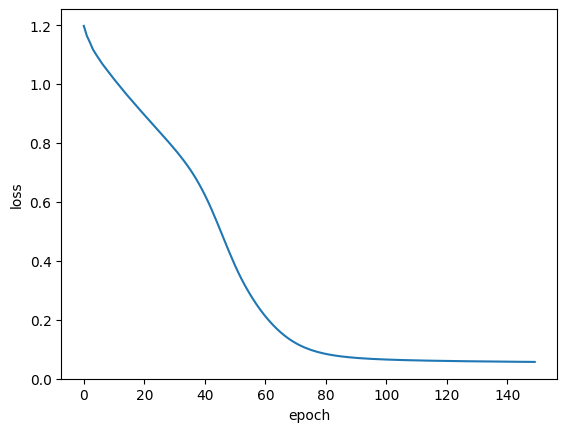

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
model = model.eval()
with torch.no_grad():

  p_y = model.forward(test_X)
  loss = criterion(p_y,test_y)
  print(loss.detach().item())

0.046268388628959656


In [ ]:
correct = 0
model = model.eval()
with torch.no_grad():
  for i,test_data in enumerate(test_X):
    y_predict = model.forward(test_data)
    print(f"{i+1}.)\t{y_predict}\t{test_y[i]}\t{y_predict.argmax()}")

    if y_predict.argmax().item() == test_y[i]:
      correct+=1
print(f"总共对了{correct}")

1.)	tensor([-2.9805,  7.8060,  2.8998])	1	1
2.)	tensor([11.7605,  4.2882, -4.7057])	0	0
3.)	tensor([-18.6843,   4.2564,  20.0950])	2	2
4.)	tensor([-3.4514,  7.4820,  3.4776])	1	1
5.)	tensor([-3.4077,  8.3576,  3.3598])	1	1
6.)	tensor([10.8711,  4.0780, -4.3608])	0	0
7.)	tensor([0.5297, 7.1929, 0.2902])	1	1
8.)	tensor([-8.8233,  6.6184,  9.4225])	2	2
9.)	tensor([-5.6955,  6.6474,  5.9003])	1	1
10.)	tensor([-0.3455,  7.5827,  0.6984])	1	1
11.)	tensor([-7.4474,  6.7764,  7.8931])	2	2
12.)	tensor([10.3395,  3.5773, -4.1979])	0	0
13.)	tensor([11.6384,  4.0489, -4.6826])	0	0
14.)	tensor([10.5251,  3.6447, -4.2671])	0	0
15.)	tensor([11.2316,  3.9162, -4.5291])	0	0
16.)	tensor([-3.0540,  8.1029,  3.0495])	1	1
17.)	tensor([-12.9941,   4.9153,  13.9639])	2	2
18.)	tensor([-0.6526,  7.4187,  0.8069])	1	1
19.)	tensor([-3.2115,  7.2571,  3.1956])	1	1
20.)	tensor([-12.8664,   4.7364,  13.8296])	2	2
21.)	tensor([10.1214,  3.6173, -4.1028])	0	0
22.)	tensor([-6.7087,  6.5383,  7.0739])	2	2
23.)	tensor([

# 预测

In [ ]:
new_iris = torch.tensor([[5.9,3.0,5.,1.8]])
model = model.eval()
with torch.no_grad():
  print(model.forward(new_iris))

tensor([[-7.5856,  6.0561,  8.0402]])


# 模型保存

In [ ]:
!pwd

/content


In [ ]:
torch.save(model.state_dict(),"My_Model.pt")

# 模型加载

In [ ]:
model = My_Model()
model.load_state_dict(torch.load('My_Model.pt'))

<All keys matched successfully>

In [ ]:
model.eval()
with torch.no_grad():
  print(model.forward(new_iris))

tensor([[-7.5856,  6.0561,  8.0402]])


# 卷积神经网络

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
from torchvision.utils import make_grid

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


# 加载MNIST数据集

In [60]:
transform = transforms.ToTensor()

In [61]:
train_data = datasets.MNIST("/CNN_DATA",train = True, download = True, transform = transform)
test_data = datasets.MNIST("/CNN_DATA",train = False, download = True,transform = transform)

In [62]:
train_data.data.shape[0]

60000

In [63]:
class ConvNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #全连接层
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)

    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    #flatten
    x = x.view(-1,5*5*16)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [64]:
torch.manual_seed(42)
model = ConvNetwork().cuda()
model

ConvNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [65]:
criterion = nn.CrossEntropyLoss()
optimize = torch.optim.Adam(model.parameters(),lr = 0.001)

In [66]:
x = torch.randn(2,1,28,28).cuda()
y = model.forward(x)
print(y)
print(torch.max(y.data,dim=1)[1])

tensor([[ 0.0531, -0.0757,  0.0993,  0.0926, -0.0763, -0.0470,  0.0306, -0.0319,
          0.0082, -0.0508],
        [ 0.0533, -0.0609,  0.0875,  0.1050, -0.0657, -0.0538,  0.0332, -0.0370,
          0.0059, -0.0484]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([2, 3], device='cuda:0')


In [67]:
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_data,batch_size=64,shuffle=False)
for i in range(epochs):
  train_loss = 0
  train_cor = 0
  for b,(train_X,train_y) in enumerate(train_loader):
    b+=1
    train_X,train_y = train_X.cuda(),train_y.cuda()
    optimize.zero_grad()
    y_pred = model.forward(train_X)

    loss = criterion(y_pred,train_y)

    loss.backward()
    optimize.step()
    train_loss += loss.detach().item()
    train_cor += (torch.max(y_pred,dim=1)[1]==train_y).sum()

    if b%600==0:
      print(f"Epoch: {i}, batch: {b}, loss: {loss.detach().item()}")
  train_losses.append(train_loss/b)
  train_correct.append(train_cor/train_data.data.shape[0])


  with torch.no_grad():
    test_loss = 0
    test_cor = 0
    for b,(test_X,test_y) in enumerate(test_loader):
      b+=1
      test_X,test_y = test_X.cuda(),test_y.cuda()
      y_pred = model.forward(test_X)
      loss = criterion(y_pred,test_y)
      test_loss += loss.detach().item()
      test_cor += (torch.max(y_pred,dim=1)[1]==test_y).sum()

  print(f"Epoch: {i}, loss: {test_loss/b}")
  test_losses.append(test_loss/b)
  test_correct.append(test_cor/test_data.data.shape[0])



Epoch: 0, batch: 600, loss: 0.16386482119560242
Epoch: 0, loss: 0.09810403066503394
Epoch: 1, batch: 600, loss: 0.05952328443527222
Epoch: 1, loss: 0.0620302074102412
Epoch: 2, batch: 600, loss: 0.11703361570835114
Epoch: 2, loss: 0.049781945315679046
Epoch: 3, batch: 600, loss: 0.01423413772135973
Epoch: 3, loss: 0.04758791611068304
Epoch: 4, batch: 600, loss: 0.017432373017072678
Epoch: 4, loss: 0.044861599691885086


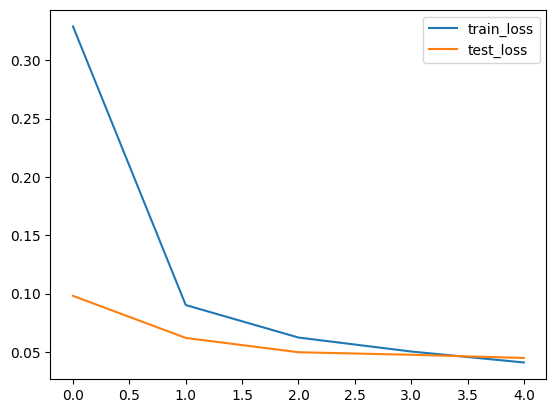

In [68]:
plt.plot(train_losses, label = "train_loss")
plt.plot(test_losses, label = "test_loss")
plt.legend()

[0.8994666934013367, 0.9720667004585266, 0.9800333380699158, 0.9843833446502686, 0.9869333505630493]
[0.9674999713897705, 0.9801999926567078, 0.9843999743461609, 0.9839999675750732, 0.9854999780654907]


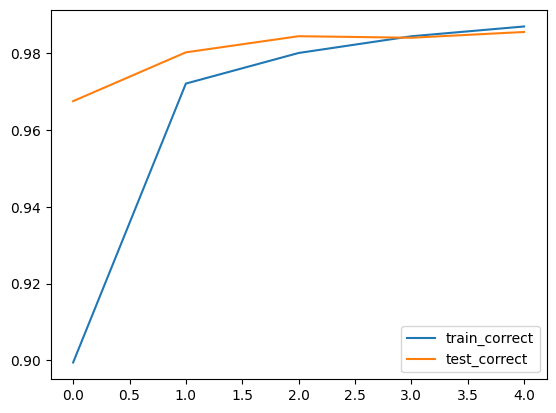

In [69]:


train_correct = [i.detach().item() for i  in train_correct]

test_correct = [i.detach().item() for i  in test_correct]
print(train_correct)
print(test_correct)
plt.plot(train_correct, label = "train_correct")
plt.plot(test_correct, label = "test_correct")
plt.legend()